In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# series
a = ['a', 'b', 'c']
myvar = pd.Series(a, index=['i', 'ii', 'iii'])
print(myvar) # column
print(myvar[0]) # first element in column => a

i      a
ii     b
iii    c
dtype: object
a


In [41]:
dict = {'Chandler': 4, 'Ross': 4, 'Joey': 2.5, 'Phoebe':2}
table = pd.Series(dict)
print(table)

Chandler    4.0
Ross        4.0
Joey        2.5
Phoebe      2.0
dtype: float64


In [42]:
# Data Frame
data = {'Name': ['Chander', 'Ross', 'Joey'], 
        'Grade': [4,3,2]}
table = pd.DataFrame(data)
print(table)

      Name  Grade
0  Chander      4
1     Ross      3
2     Joey      2


In [43]:
weather_str = 'Sunny/Clear.Showery.Cloudy.Overcast.Rainy.Drizzle.Snowy.Stormy'
weather_list = weather_str.split('.')
weather = np.random.choice(weather_list, np.random.randint(10,20))

def indexes(num):
    days = list()
    for i in range(1, num + 1):
        days.append('day ' + str(i))
    return days

df = pd.DataFrame(weather, index=indexes(weather.size), columns=['Weather'])
print(df)


            Weather
day 1        Cloudy
day 2       Drizzle
day 3        Cloudy
day 4   Sunny/Clear
day 5   Sunny/Clear
day 6        Cloudy
day 7        Stormy
day 8        Cloudy
day 9       Drizzle
day 10     Overcast


In [44]:
# exercise

exam_data = {'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'], 
             'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19], 
             'attempts': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1], 
             'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}

df = pd.DataFrame(exam_data, index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
print(df.iloc[0:3])

        name  score  attempts qualify
a  Anastasia   12.5         1     yes
b       Dima    9.0         3      no
c  Katherine   16.5         2     yes


# Reading pokemon data csv file

In [45]:
# read csv files

df = pd.read_csv('pokemon_data.csv')
print(df.head(10)) # display first 10 rows
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

   #                       Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0  1                  Bulbasaur  Grass  Poison  45      49       49       65   
1  2                    Ivysaur  Grass  Poison  60      62       63       80   
2  3                   Venusaur  Grass  Poison  80      82       83      100   
3  3      VenusaurMega Venusaur  Grass  Poison  80     100      123      122   
4  4                 Charmander   Fire     NaN  39      52       43       60   
5  5                 Charmeleon   Fire     NaN  58      64       58       80   
6  6                  Charizard   Fire  Flying  78      84       78      109   
7  6  CharizardMega Charizard X   Fire  Dragon  78     130      111      130   
8  6  CharizardMega Charizard Y   Fire  Flying  78     104       78      159   
9  7                   Squirtle  Water     NaN  44      48       65       50   

   Sp. Def  Speed  Generation  Legendary  
0       65     45           1      False  
1       80     60           1    

In [46]:
# display headers
print(df.columns)

# display specific coulmns
print(df['Name'][20:25])

#diplay multiple columns
print(df[['Name', 'HP', 'Attack']][0:5])

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')
20                 Pidgey
21              Pidgeotto
22                Pidgeot
23    PidgeotMega Pidgeot
24                Rattata
Name: Name, dtype: object
                    Name  HP  Attack
0              Bulbasaur  45      49
1                Ivysaur  60      62
2               Venusaur  80      82
3  VenusaurMega Venusaur  80     100
4             Charmander  39      52


In [47]:
# rows
# print(df.head(10)) # first nth rows


# using for!
for index, row in df.iterrows():
    print(index, row['Name'])
    if index > 10:
        break
        


0 Bulbasaur
1 Ivysaur
2 Venusaur
3 VenusaurMega Venusaur
4 Charmander
5 Charmeleon
6 Charizard
7 CharizardMega Charizard X
8 CharizardMega Charizard Y
9 Squirtle
10 Wartortle
11 Blastoise


In [48]:
# specific rows using iloc
# print(df.iloc[5:15])

# using loc
#print(df.loc[0]) # using index

print(df.loc[df['Type 1'] == 'Fire']) # print it if type 1 is Fire


       #                       Name Type 1    Type 2   HP  Attack  Defense  \
4      4                 Charmander   Fire       NaN   39      52       43   
5      5                 Charmeleon   Fire       NaN   58      64       58   
6      6                  Charizard   Fire    Flying   78      84       78   
7      6  CharizardMega Charizard X   Fire    Dragon   78     130      111   
8      6  CharizardMega Charizard Y   Fire    Flying   78     104       78   
42    37                     Vulpix   Fire       NaN   38      41       40   
43    38                  Ninetales   Fire       NaN   73      76       75   
63    58                  Growlithe   Fire       NaN   55      70       45   
64    59                   Arcanine   Fire       NaN   90     110       80   
83    77                     Ponyta   Fire       NaN   50      85       55   
84    78                   Rapidash   Fire       NaN   65     100       70   
135  126                     Magmar   Fire       NaN   65      9

## Adding Total column

### method no. 1

### we can convert series to numpy array with .to_numpy e.g. df[ ... ].to_numpy()

In [49]:
power_list = list((df.columns))
unwanted = ['#', 'Name', 'Type 1', 'Type 2', 'Generation', 'Legendary']
power_list = [element for element in power_list if element not in unwanted]
# df3 = df.head()
df3 = df
arr = df3.to_numpy()
arr = np.delete(arr, obj=[0,1,2,3,10,11], axis=1)
total_list = np.sum(arr, axis=1)
print(total_list)
df['Total'] = total_list
df

[318 405 525 625 309 405 534 634 634 314 405 530 630 195 205 395 195 205
 395 495 251 349 479 579 253 413 262 442 288 438 320 485 300 450 275 365
 505 273 365 505 323 483 299 505 270 435 245 455 320 395 490 285 405 305
 450 265 405 290 440 320 500 305 455 350 555 300 385 510 310 400 500 590
 305 405 505 300 390 490 335 515 300 390 495 410 500 315 490 590 325 465
 352 310 460 325 475 325 500 305 525 310 405 500 600 385 328 483 325 475
 330 480 325 520 320 425 455 455 385 340 490 345 485 450 435 490 590 295
 440 320 450 340 520 460 500 455 490 495 500 600 490 200 540 640 535 288
 325 525 525 525 395 355 495 355 495 515 615 540 580 580 580 300 420 600
 680 780 780 600 318 405 525 309 405 534 314 405 530 215 415 262 442 265
 390 250 390 535 330 460 205 218 210 245 405 320 470 280 365 510 610 490
 250 420 410 500 250 340 460 360 180 425 390 210 430 525 525 405 490 435
 336 405 455 290 465 415 430 510 610 300 450 430 500 600 505 500 600 430
 330 500 250 410 250 450 380 300 480 330 465 465 33

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,700
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,600
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,680


### method no. 2

In [12]:
df['Total'] = df.iloc[:,4:10].sum(axis = 1)
df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,700
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,600
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,680


# Sorting and Describing

### df.describe()

In [13]:
df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Total
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,435.10250
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,119.96304
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,180.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,330.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,450.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,515.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,780.00000


In [14]:
df.describe().mean() # display only mean row
df.describe().mean().loc['Attack'] # mean attack

167.0573269836873

### corr, describe, plot example!!

               HP    Attack   Defense   Sp. Atk   Sp. Def     Speed     Total
HP       1.000000  0.853464  0.807323  0.873751  0.869826  0.827164  0.949398
Attack   0.853464  1.000000  0.848219  0.904344  0.715207  0.841725  0.952471
Defense  0.807323  0.848219  1.000000  0.700249  0.777618  0.570869  0.860257
Sp. Atk  0.873751  0.904344  0.700249  1.000000  0.844198  0.862130  0.957351
Sp. Def  0.869826  0.715207  0.777618  0.844198  1.000000  0.580120  0.875195
Speed    0.827164  0.841725  0.570869  0.862130  0.580120  1.000000  0.856494
Total    0.949398  0.952471  0.860257  0.957351  0.875195  0.856494  1.000000


********************************************************************************



              HP      Attack     Defense     Sp. Atk     Sp. Def       Speed       Total
count  10.000000   10.000000   10.000000   10.000000   10.000000   10.000000   10.000000
mean   64.000000   77.500000   75.100000   95.500000   82.900000   75.300000  470.300000
std    16.792856   27.4

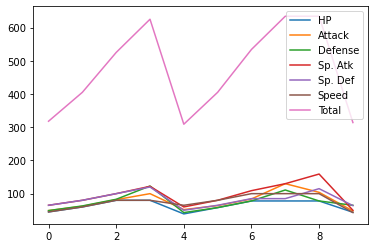

In [15]:
df_temp = df.iloc[0:10].drop(columns=['#', 'Generation', 'Legendary'])

df_temp.plot()
print(df_temp.corr().to_string() + '\n\n\n' + '*'*80 + '\n\n\n')

print(df_temp.describe().to_string())

### an example!

In [16]:
# e.g. 
pivot = df.describe().mean().loc['Attack']
df.loc[df['Attack'] >= pivot]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True,780
232,214,HeracrossMega Heracross,Bug,Fighting,80,185,115,40,105,75,2,False,600
424,383,GroudonPrimal Groudon,Ground,Fire,100,180,160,150,90,90,3,True,770
426,384,RayquazaMega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True,780
429,386,DeoxysAttack Forme,Psychic,NaN,50,180,20,180,20,150,3,True,600
494,445,GarchompMega Garchomp,Dragon,Ground,108,170,115,120,95,92,4,False,700
711,646,KyuremBlack Kyurem,Dragon,Ice,125,170,100,120,90,95,5,True,700


# Cleaning Data

# Correleations

In [17]:
df1 = pd.read_csv('data.csv')
df1

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [18]:
df1.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.155408,0.009403,0.922717
Pulse,-0.155408,1.000000,0.786535,0.025121
Maxpulse,0.009403,0.786535,1.000000,0.203813
Calories,0.922717,0.025121,0.203813,1.000000


<AxesSubplot:>

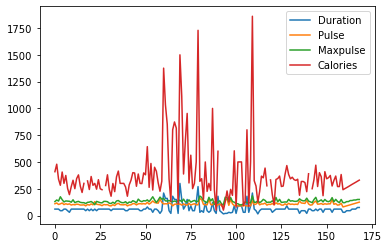

In [19]:
df1.plot()